In [32]:
# Re-import necessary libraries and load the new dataset again
import pandas as pd

# Load the new dataset
new_file_path = 'heart_records_100k.csv'
heart_records_data = pd.read_csv(new_file_path)

# Display the first few rows of the new dataset to understand its structure
heart_records_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import joblib

# Copy the data for manipulation
df = heart_records_data.copy()

# Encode categorical variables into numeric values
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])

# Define features (X) and target (y)
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Save the scaler for future use
joblib.dump(scaler, 'new_scaler.pkl')

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Progress bar for model training
with tqdm(total=100, desc="Training Progress") as pbar:
    for _ in range(10):  # Simulate 10 updates
        rfc.fit(X_train_scaled, y_train)
        pbar.update(10)

# Save the trained model
joblib.dump(rfc, 'new_heart_attack_model.pkl')

# Predictions
y_pred = rfc.predict(X_test_scaled)

Training Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [01:42<00:00,  1.02s/it]


Accuracy: 91.65%
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     10404
           1       0.94      0.91      0.92     12776

    accuracy                           0.92     23180
   macro avg       0.91      0.92      0.92     23180
weighted avg       0.92      0.92      0.92     23180



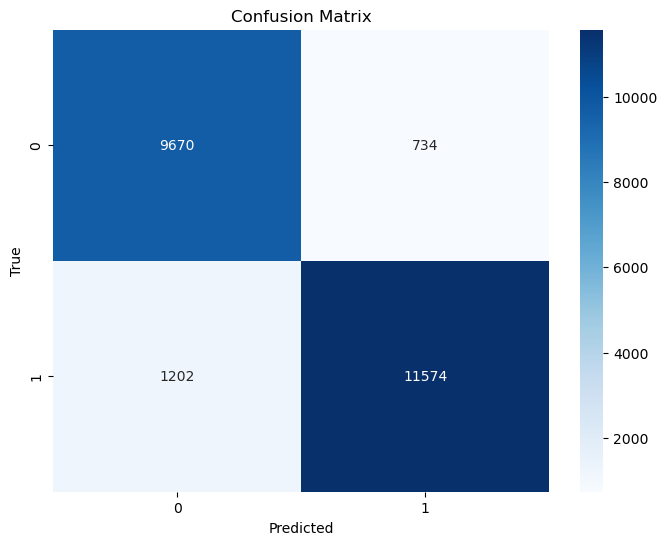

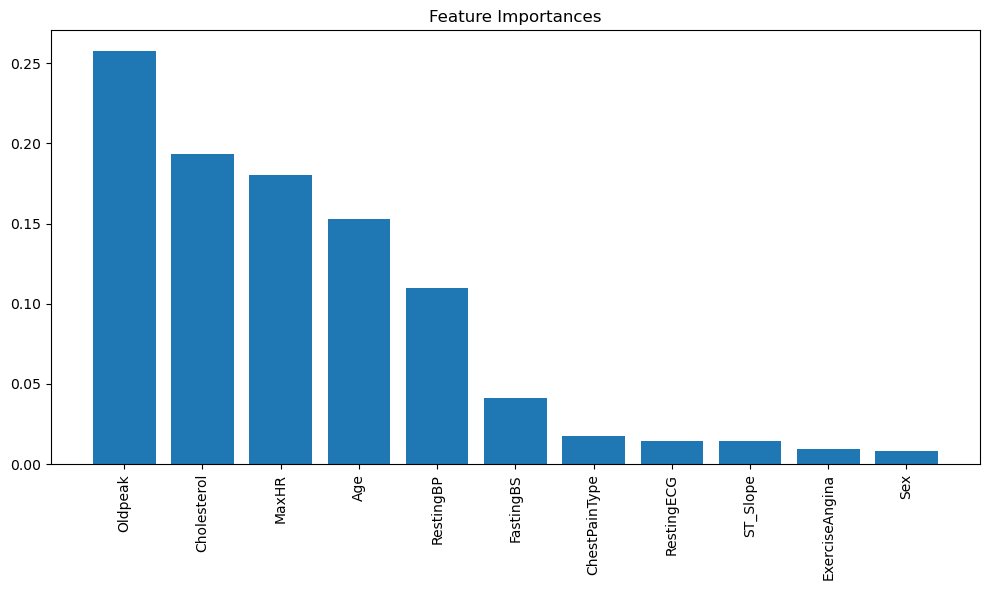

In [35]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature importance
importances = rfc.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()